# Predictive Energy Management and Smart Dispatch Optimization for IoT-Enabled Microgrids

# Prepared by: Oumaima Werghemmi

# 📘 Introduction

The evolution of smart energy systems is closely tied to the integration of **renewable energy sources** and the deployment of **IoT (Internet of Things) technologies**. In modern microgrid environments, IoT enables continuous, real-time monitoring of energy production, environmental conditions, and grid performance—creating new opportunities for intelligent forecasting, automated control, and optimization.

This project utilizes a comprehensive dataset containing **3,546 hourly samples** collected from a **grid-connected microgrid**. The dataset reflects a real-world IoT-enabled energy system, where various sensors and smart devices capture:

- **Renewable energy generation** from solar PV and wind turbines  
- **Environmental parameters** such as solar irradiance, wind speed, temperature, and humidity  
- **Grid operation metrics**, including voltage, frequency, grid load demand, and power exchange  
- **Battery system data** such as charging/discharging rates and state of charge  
- **Temporal features** (hour and day of week) to understand cyclical behavior  

The dataset also includes **machine learning targets**: predicted solar and wind power output (`predicted_solar_pv_output`, `predicted_wind_power_output`, `total_predicted_energy`). This makes it ideal for developing predictive models that support real-time decision-making in IoT-based energy management systems.

## 🔗 Role of IoT

In this context, **IoT acts as the data backbone** of the microgrid, enabling:

- High-resolution monitoring of energy resources and environmental conditions  
- Real-time data collection for **dynamic forecasting** and **adaptive load balancing**  
- Informed scheduling of energy storage (battery dispatch) and demand response actions  
- Enhanced grid reliability through continuous feedback and automated control  

## 🎯 Project Goals

This study focuses on:

1. **Forecasting total renewable energy output** using environmental and temporal IoT sensor data  
2. **Predicting grid load demand** to assist in real-time demand response and energy planning  
3. Supporting intelligent battery dispatch strategies through accurate short-term energy modeling  

By leveraging IoT-driven data and machine learning, the project aims to demonstrate how smart microgrids can become more **efficient**, **predictive**, and **resilient**—paving the way for sustainable, autonomous energy systems.


# 🔋 Battery Degradation in Microgrid Optimization

Batteries play a pivotal role in **microgrid systems**, enabling advanced energy storage, load balancing, and distribution. In IoT-enabled microgrids, battery systems are responsible for storing excess energy during periods of low demand or high renewable generation, and dispatching it during peak demand or when renewable output is low.

However, the **degradation of Battery Energy Storage Systems (BESS)** is a critical challenge. It directly impacts the **economic viability**, **efficiency**, and **longevity** of microgrid operations. In the context of this project, where real-time energy forecasting is used to optimize grid performance and battery scheduling, understanding battery degradation is essential for accurate modeling and cost-effective decision-making.

## ⚠️ Why Battery Degradation Matters

- **Cost impact**: BESS is one of the most expensive components in microgrids, with a shorter lifecycle compared to other hardware.
- **Usage-dependent wear**: Battery degradation is highly sensitive to how and when the battery is charged and discharged.
- **Optimization dependency**: Effective microgrid optimization must account for degradation to extend battery life and minimize replacement costs.

While components like inverters degrade slowly and independently of load, **battery degradation is tightly linked to dispatch strategies**—making it a key factor to consider in our project.

---

## 🧠 Integration with IoT-Driven Microgrids

In this project, we use a dataset derived from a **grid-connected microgrid**, capturing real-time IoT-based data such as:

- `battery_state_of_charge`
- `grid_load_demand`
- Environmental features (e.g., `temperature`, `solar_irradiance`, `wind_speed`)

By combining this rich data with predictive modeling of renewable generation and load demand, we aim to **optimize battery usage** while minimizing degradation impacts.

---

## ⚙️ Battery Degradation Factors

### 1. **Temperature**
High temperatures accelerate battery degradation by increasing chemical activity and self-discharge rates, potentially leading to thermal runaway.  
Low temperatures, on the other hand, reduce voltage and efficiency until normal ranges are restored.  
**Thermal management systems** (e.g., heat sinks, insulation, cooling) are essential to stabilize battery conditions.

In this project, we will not target the impact of temperature for simplification resons.

### 2. **Depth of Discharge (DoD)**
DoD measures how much of the battery’s capacity is used in a cycle.  
- Higher DoD = faster degradation  
- Lower DoD = longer lifespan  
📉 **Cycle life follows a logarithmic decline** with increasing DoD:  
`Cycle Life = α · log(DoD) + β`  
Our project can use such empirical relationships or manufacturer data to estimate degradation costs.

### 3. **State of Charge (SoC)**
Maintaining SoC within an optimal range (typically **20%–80%**) helps reduce chemical and thermal stress on the battery.  
- High SoC → more internal pressure and heat  
- Low SoC → material strain and capacity loss  
Effective battery management systems use real-time SoC data (available in our dataset) to optimize charge cycles.

### 4. **Charge/Discharge Rate (C-rate)**
C-rate is a measure of how quickly a battery is charged/discharged relative to its capacity:  
`C-rate = Charging/Discharging Current (A) / Battery Capacity (Ah)`

- High C-rates → more heat + faster degradation  
- Low C-rates → less thermal and mechanical stress  

Our dataset includes `battery_charging_rate` and `battery_discharging_rate`, which can help estimate effective C-rates for degradation-aware optimization.

Since the actual battery capacity (in kWh) is not explicitly provided, we approximate it by using the **maximum charging rate** observed in the data:

$$
\text{Battery Capacity (kWh)} = \max(\text{battery_charging_rate})
$$

This assumes that the battery is capable of being fully charged in 1 hour at its maximum observed charging rate — a reasonable approximation for degradation analysis when direct capacity information is unavailable.

The **C-rate** is then calculated as:
$$
\text{C-rate} = \frac{\text{Charging or Discharging Power (kW)}}{ \text{Estimated Battery Capacity (kWh)}}
$$
---

## 🎯 Project Implications

By integrating **IoT-derived data**, **energy forecasting**, and **battery degradation models**, this project aims to:

- Extend battery lifespan through optimized dispatching
- Lower operational and replacement costs
- Enhance sustainability of the microgrid
- Support intelligent scheduling that balances demand, storage, and generation




## 🔋 B. Battery Degradation Model (Adapted for Our Microgrid Forecasting Project)

In this project, we work with an IoT-enabled, grid-connected microgrid dataset containing 3546 hourly records of energy production, battery usage, and environmental conditions. Among the key features are:

- `battery_state_of_charge`
- `total_renewable_energy`
- `grid_load_demand`

These features enable us to monitor how batteries are used and to model their degradation over time — essential for both operational planning and cost-efficient system design.

---

### 🧠 What is Battery Degradation?

**Battery Energy Storage Systems (BESS)** degrade over time, losing capacity due to factors such as:

- **Depth of Discharge (DoD)**: How deeply the battery is discharged in each cycle.
- **State of Charge (SoC)**: The current charge level of the battery.
- **Charging/Discharging Patterns**: Especially at high C-rates (charging speed).
- **Temperature**: Often managed by thermal systems and thus considered negligible in this analysis.

In our project, we focus on **SoC and DoD**, which are available in the dataset.

---

### 📉 SoC, DoD, and Their Role

- **SoC** is directly provided as `battery_state_of_charge` (%).
- **DoD** is calculated as:

$$
\text{DoD} = 100\% - \text{SoC}
$$

Batteries frequently discharged to high DoD values degrade faster. Understanding SoC and DoD patterns is essential for evaluating BESS health and managing energy effectively.

---

### 🔬 Degradation Model

Modern BESS units often include climate control, so **temperature-related degradation** is minimal. According to manufacturers and prior research, **DoD is the main driver of battery wear**.

We adopt a **cycle-based degradation model** based on the change in **State of Health (SoH)** between two time steps \( t_0 \) and \( t_1 \):

$$
\Delta \text{SOH}(Q_{t0}, Q_{t1}) = \frac{1}{N_{\text{cycle}}(Q_{t1})} - \frac{1}{N_{\text{cycle}}(Q_{t0})}
$$

Where:
- $$ \Delta \text{SOH}$$ is the change in battery health,
- $$ Q_{t0}, Q_{t1} $$ are the battery charge levels at times \( t_0 \) and \( t_1 \),
- $$ N_{\text{cycle}}(Q) $$ is the estimated cycle life at that charge level.

This relationship allows us to track the incremental wear on the battery based on its usage patterns.

---

### 💸 Degradation Cost Estimation

The cost of degradation is modeled as:

$$
\text{Degradation Cost} = \text{Initial Battery Cost} \times \Delta \text{SOH}
$$

This allows us to incorporate economic impacts into the optimization of battery dispatch schedules.

---

### ⚙️ Implementation Notes

- SoC is already available in the dataset.
- DoD is computed as $$ \text{DoD} = 100\% - \text{SoC} $$
- C-rate can be estimated using:

$$
\text{C-rate} = \frac{\text{battery_charging_rate}}{\max(\text{battery_charging_rate})}
$$

- C-rates below 1.0 are assumed to have negligible degradation impact.

---

### ✅ Why This Matters

Incorporating a degradation-aware model:

- Promotes long-term sustainability,
- Reduces unnecessary battery replacements,
- Enables smarter, cost-aware battery scheduling.

This is essential for maximizing the efficiency and lifespan of battery systems in smart microgrids.


## III. SYSTEM OVERVIEW

This section outlines the system architecture of the proposed microgrid management model, highlighting the structure, forecasting mechanisms, and optimization approach designed to enhance energy efficiency and operational cost-effectiveness.

---

### A. SYSTEM ARCHITECTURE

The proposed system is designed for a grid-connected microgrid and leverages a comprehensive dataset containing 3546 hourly samples of power generation, battery operation, and environmental conditions. The microgrid incorporates:

- **Photovoltaic (PV) solar panels** and **wind turbines** for renewable energy generation,
- A **Battery Energy Storage System (BESS)** for storing surplus energy and balancing supply-demand,
- **Grid connection** for importing or exporting electricity based on power exchange requirements,
- **Buildings and local infrastructure** as primary energy consumers.

The system is augmented with IoT-based metering and control systems that continuously log parameters such as:

- `total_renewable_energy`
- `battery_state_of_charge`
- Environmental data: `solar_irradiance`, `temperature`, `wind_speed`, `humidity`, and more
- Operational data: `grid_load_demand`, `power_exchange`, `voltage`, `frequency`

This rich dataset supports both real-time monitoring and predictive analytics for decision-making. It enables the forecasting of energy supply and demand, which feeds into an optimization framework for cost-effective and reliable energy scheduling.

---

### B. LOAD AND POWER GENERATION FORECASTING

Accurate forecasting of renewable energy generation and grid load demand is essential for microgrid optimization. In this project:

- Solar and wind power forecasts are provided via `total_renewable_energy`,
- The sum of these forecasts yields `predicted_renewable_energy`,
- Historical data trends and time-series features such as `hour_of_day` and `day_of_week` are utilized for model training.

Machine learning models are trained using the historical data to identify temporal patterns, seasonality, and weather dependencies. This forecasting framework enables proactive control strategies for dispatching stored energy and engaging in demand response.

---

### C. OPTIMIZATION PROBLEM

The optimization problem is formulated to minimize the operational cost of the microgrid while maintaining grid stability and battery health. The two main decision objectives are:

1. **Optimal Battery Dispatch Schedule**  
   Optimize the use of the BESS by selecting appropriate charging and discharging rates over time, while respecting:
   - Maximum charging/discharging limits
   - State of charge (SoC) boundaries
   - Battery degradation constraints (based on estimated C-rate and DoD)

2. **Demand Response (DR) Strategy**  
   Optimize the timing and scaling of flexible loads by:
   - Shifting Type I loads (shiftable in time) within allowed scheduling windows,
   - Shedding or reducing Type II loads (curtailable) as necessary.

Let:
- X_1 : Vector of battery dispatch decisions (charging/discharging rates)
- X_2 : Start times for flexible loads
- X_3 : Binary indicators for curtailment actions

The optimization model integrates forecasted generation and demand, real-time battery conditions, and degradation-aware constraints to achieve a cost-minimizing and reliable schedule.


# Battery Degradation Cost Calculation

This model estimates battery degradation cost based on the **Depth of Discharge (DoD)** and corresponding **cycle life**. It is commonly used in energy dispatch optimization and economic analysis of battery energy storage systems (BESS).

## Assumptions and Model

1. **Degradation per time step** is modeled using:

   $$
   \Delta \mathrm{SoH} = \frac{1}{N_{\text{cycle}}(\text{DoD})}
   $$

   where $$ \( \text{DoD} = |\mathrm{SOC}_{t+1} - \mathrm{SOC}_t| \) and \( N_{\text{cycle}} \)$$ is the estimated number of cycles the battery can sustain at that DoD.

2. **Degradation cost per step** is computed as:

   $$
   \text{Cost}_{\text{degradation}} = \text{Battery Initial Cost} \times \Delta \mathrm{SoH}
   $$

3. **Battery Parameters** used in the model:

   - Initial cost: 10,000 currency units (e.g., dollars)
   - Capacity: 100 kWh
   - Charge and discharge efficiency: 95%
   - State of Charge (SOC) limits: 0% – 100%

## 📊 Empirical Depth of Discharge vs Cycle Life Data

| DoD (%) | Estimated Cycle Life (Cycles) | Source |
|---------|-------------------------------|--------|
| 0       | Infinite                      | Battery University¹ |
| 10      | 6000                         | Battery University¹ |
| 20      | 4000                         | Battery University¹ |
| 50      | 2000                         | Battery University¹ |
| 80      | 1000                         | Battery University¹ |
| 100     | 500                          | Battery University¹ |

The cycle life for intermediate DoD values is estimated via **piecewise linear interpolation** between these points.

## 🔗 References

1. **Battery University - BU-808: How to Prolong Lithium-based Batteries**  
   [https://batteryuniversity.com/article/bu-808-how-to-prolong-lithium-based-batteries](https://batteryuniversity.com/article/bu-808-how-to-prolong-lithium-based-batteries)  
   This resource provides empirical data on cycle life vs. depth of discharge for lithium-ion batteries, which is widely used to estimate degradation.
2. https://elib.dlr.de/204742/2/Advanced_Genetic_Algorithm_for_Optimal_Microgrid_Scheduling_Considering_Solar_and_Load_Forecasting_Battery_Degradation_and_Demand_Response_Dynamics.pdf

![Battery Schedule](model.jpg)

# IV. MATHEMATICAL MODELING

This section presents the mathematical formulation used to optimize the operation of a Battery Energy Storage System (BESS) coupled with a Demand Response (DR) strategy in a grid-connected microgrid. The goal is to schedule battery charge/discharge and demand response actions to minimize a combined operational cost while respecting system constraints.

---

## A. PROBLEM DEFINITION

The optimization variables are encoded in the chromosome structure used by the genetic algorithm:

**Battery Dispatch Decisions:**

$$
X_1 = \{ c_1, c_2, \ldots, c_T \}
$$

where each

$$
c_t \in [-c_{\max}, c_{\max}]
$$

represents the discrete battery charge (+) or discharge (−) step at time \(t\), measured in percentage points of battery State of Charge (SOC). The battery SOC evolves hourly as:

$$
SOC_t = SOC_{t-1} + c_t,
$$

bounded by minimum and maximum SOC limits.

---

**Demand Response Shiftable Loads:**

$$
X_2 = \{ h_1, h_2, \ldots, h_{M_1} \},
$$

where each \(h_i\) is an integer representing the scheduled start time for shiftable load \(i\) within a predefined allowable window.

---

**Demand Response Sheddable Loads:**

$$
X_3 = \{ b_1, b_2, \ldots, b_{M_2} \},
$$

where

$$
b_i \in \{0, 1\}
$$

indicates whether load \(i\) is curtailed (1) or served (0).

---

## B. OBJECTIVE FUNCTION

The fitness function, evaluated for each chromosome \((X_1, X_2, X_3)\), captures operational costs and penalties:

$$
\min C = \sum_{t=1}^{T} \left( \alpha \cdot |c_t| + \beta \cdot \text{Deficit}_t + \gamma \cdot \text{Surplus}_t \right)
+ \delta \sum_{i=1}^{M_1} h_i
+ \epsilon \sum_{i=1}^{M_2} b_i
+ \zeta \sum_{t=1}^{T} \left( \frac{C_{\text{batt}}}{N(\text{DoD}_t)} \right)
$$

Where:

- \( c_t \): battery dispatch at time \( t \) (positive for charge, negative for discharge)  
- \( \text{Deficit}_t \): unmet load at time \( t \)  
- \( \text{Surplus}_t \): excess energy at time \( t \)  
- \( h_i \), \( b_i \): demand response participation penalties  
- \( \text{DoD}_t = |\text{SOC}_{t+1} - \text{SOC}_t| \): depth of discharge at time \( t \)  
- \( N(\text{DoD}_t) \): number of cycles for a given DoD%  
- \( C_{\text{batt}} \): initial battery capital cost  


where:

- $$\(\left| c_t \right|\) $$ penalizes battery usage to reflect degradation and operational wear,

- $$
\text{Deficit}_t = \max\left(0, \text{load}_t - (\text{renewable}_t + \text{battery}_t)\right)
$$

penalizes unmet load (energy deficit),

- $$
\text{Surplus}_t = \max\left(0, (\text{renewable}_t + \text{battery}_t) - \text{load}_t \right)
$$

penalizes energy surplus (wasted generation),

- $$ \(\alpha, \beta, \gamma, \delta, \epsilon\) $$ are weighting factors representing costs and penalties,

- The terms \(\sum h_i\) and \(\sum b_i\) incorporate penalty costs related to DR scheduling and load shedding.


---

## C. CONSTRAINTS

- **Battery SOC Limits:**

$$
SOC_{\min} \leq SOC_t \leq SOC_{\max}, \quad \forall t
$$

- **Battery Power Limits:**

The battery power corresponding to dispatch step \(c_t\) must satisfy:

$$
|P_{\text{battery}, t}| = \left| c_t \times \frac{E_{\text{batt}}}{100} \right| \leq P_{\text{battery, max}},
$$

where \(E_{\text{batt}}\) is the battery capacity.

- **Feasibility of DR Variables:**

Shiftable loads \(h_i\) are constrained to allowable scheduling windows within \([0, T - T_d]\).

Sheddable loads

$$
b_i \in \{0, 1\}.
$$

---

## D. SYSTEM OPERATION

At each timestep \(t\), the net power balance is:

$$
\text{Net Supply}_t = \text{renewable}_t + P_{\text{battery}, t}
$$

The system penalizes deviations where load demand is not met or surplus energy is generated unnecessarily, promoting cost-effective and reliable operation.

## E. Fitness Score

The fitness function is defined as an inverse cost metric (to convert the minimization objective into a maximization one):

$$
\text{Fitness} = \frac{1}{\left( \text{SN} + C \right)^k}
$$

Where:

- $C$: total cost (as defined above),
- SN: a small constant to avoid division by zero,
- $k$: scaling exponent (e.g., $k = 0.1$) to shape the fitness landscape.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('Renewable_energy_dataset.csv')

In [ ]:
print(df.head())

             timestamp  solar_pv_output  wind_power_output  \
0  2023-01-01 00:00:00        37.454012           8.273684   
1  2023-01-01 01:00:00        95.071431          48.453800   
2  2023-01-01 02:00:00        73.199394          30.241951   
3  2023-01-01 03:00:00        59.865848          56.340836   
4  2023-01-01 04:00:00        15.601864          80.380489   

   total_renewable_energy  solar_irradiance  wind_speed  temperature  \
0               45.727695        751.423457   18.770285    18.094905   
1              143.525230        301.682091    6.638605    11.669042   
2              103.441345        485.378535   14.296742    12.945826   
3              116.206685        673.986395   22.357572    38.478603   
4               95.982353        868.457364   11.879943     4.807723   

    humidity  atmospheric_pressure  grid_load_demand  ...     voltage  \
0  53.215610           1004.872349        294.401249  ...  228.933029   
1  63.906997           1009.493484        185.82

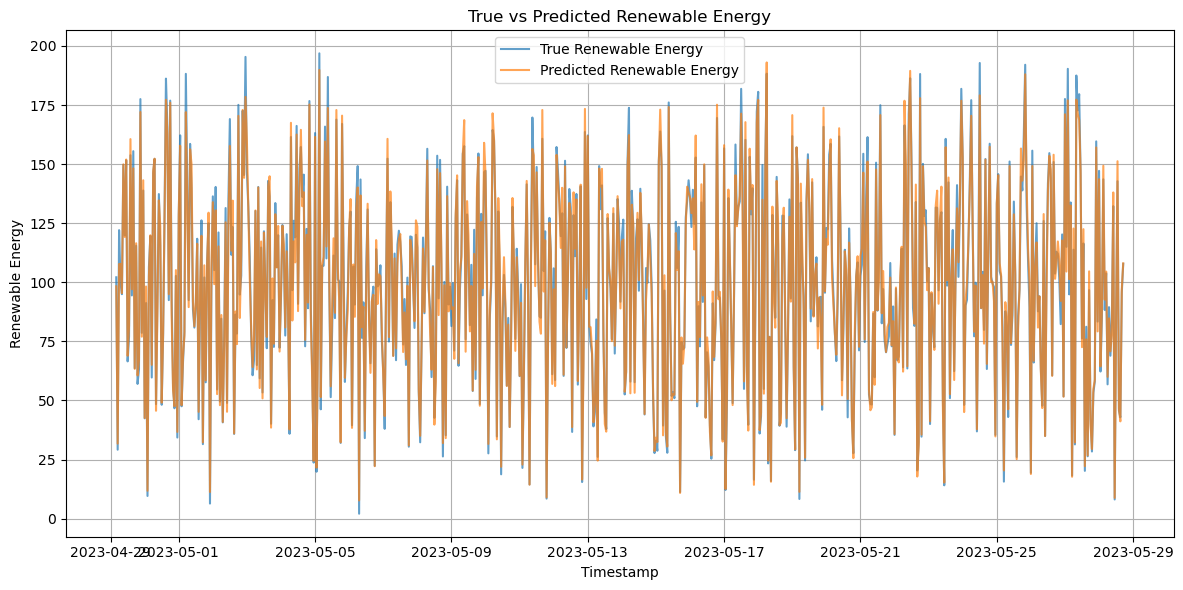

In [ ]:
result = pd.read_csv('renewable_energy_prediction.csv', parse_dates=['timestamp'])

plt.figure(figsize=(12, 6))
plt.plot(result['timestamp'], result['true_renewable'], label='True Renewable Energy', alpha=0.7)
plt.plot(result['timestamp'], result['predicted_renewable'], label='Predicted Renewable Energy', alpha=0.7)
plt.xlabel('Timestamp')
plt.ylabel('Renewable Energy')
plt.title('True vs Predicted Renewable Energy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


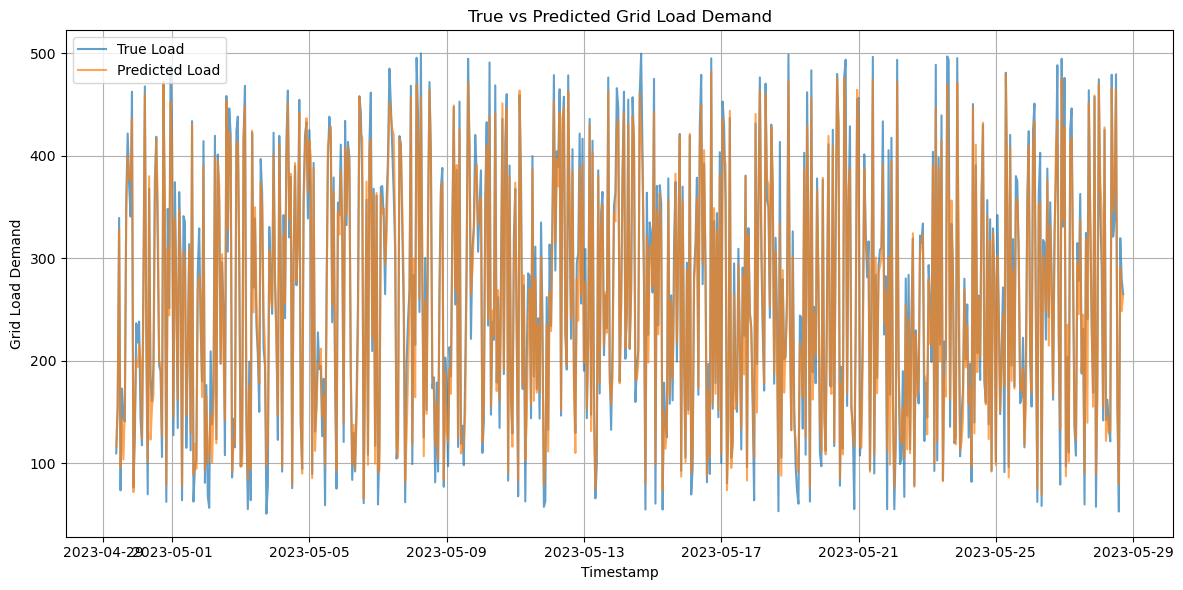

In [ ]:
results_df = pd.read_csv('load_demand_predictions.csv', parse_dates=['timestamp'])

y_pred_load=results_df['predicted_load']
# Plot true vs predicted grid load demand over time
plt.figure(figsize=(12, 6))
plt.plot(results_df['timestamp'], results_df['true_load'], label='True Load', alpha=0.7)
plt.plot(results_df['timestamp'], results_df['predicted_load'], label='Predicted Load', alpha=0.7)
plt.xlabel('Timestamp')
plt.ylabel('Grid Load Demand')
plt.title('True vs Predicted Grid Load Demand')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



# V. Optimization

## Method 1: Genetic Algorithm (GA)


This section describes the optimization algorithm used to determine the optimal operation of the Battery Energy Storage System (BESS) and implement a cost-effective Demand Response (DR) strategy using a Genetic Algorithm (GA). The GA is designed to minimize operational costs, reduce battery degradation, and maintain energy balance based on forecasted renewable generation and demand.

---

### 1) Chromosome Representation

Each solution (chromosome) is represented as a **triplet**:

- $$ X_1 = \{c_1, c_2, ..., c_T\} $$: Battery charge/discharge schedule over \( T \) time intervals (hours or 5-min slots).
  - $$ c_t \in [-c_{\text{max}}, +c_{\text{max}}] $$ is derived from your dataset using:
    $$
    c_{\text{max}} = \max(\text{{battery\_charging\_rate}})
    $$
  - Positive values: charging, negative values: discharging, 0: idle.

- $$ X_2 = \{h_1, h_2, ..., h_{M_1}\} $$: Start times of \( M_1 \) shiftable (Type I) loads within allowable windows.

- $$ X_3 = \{b_1, b_2, ..., b_{M_2}\} $$: Binary vector indicating which sheddable (Type II) loads are curtailed.

---

### 2) Genetic Algorithm Overview



### Problem Setup

- **Objective:** Minimize operational costs while respecting battery and load constraints.
- **Decision Variables:**
  - `X1`: Battery dispatch steps (charge/discharge amounts per hour).
  - `X2`: Demand Response start times.
  - `X3`: Demand Response activation flags (binary).
- **Constraints:**
  - Battery power limits.
  - Battery state-of-charge (SOC) limits.
  - Load balance with renewable generation and battery dispatch.
- **Fitness:** A function inversely related to cost, penalizing constraint violations.

### GA Workflow

1. **Initialization:** Generate a population of random solutions.
2. **Evaluation:** Calculate fitness of each solution.
3. **Selection:** Choose parents based on fitness probabilities.
4. **Crossover:** Exchange parts of parent chromosomes to create offspring.
5. **Mutation:** Randomly alter genes to maintain diversity.
6. **Elitism:** Retain top-performing individuals for next generation.
7. **Local Search:** Fine-tune the best individuals by small modifications.
8. **Diversity Injection:** Periodically add random individuals to prevent stagnation.
9. **Mutation Rate Adaptation:** Increase mutation probability if improvement stalls.
10. **Iteration:** Repeat for a fixed number of generations.

---

## Used Functions

### `__init__`

- Sets problem parameters, battery specs, and GA parameters.
- Stores input data: load forecast, renewable forecast, and initial SOC.

---

### `generate_chromosome`

- Creates a random candidate solution consisting of:
  - `X1`: Battery dispatch steps (integers between `-cmax` and `cmax`).
  - `X2`: DR start times (integers within feasible time window).
  - `X3`: DR activation flags (0 or 1).

---

### `fitness_function`

- Calculates fitness by:
  - Simulating battery dispatch over time.
  - Checking power and SOC constraints.
  - Calculating penalties for battery usage, energy deficits, surpluses, DR scheduling and SoH constraint.
  - Returning a fitness score inversely related to total cost.

---

### `initialize_population`

- Generates an initial population of random chromosomes.

---

### `select_population`

- Implements roulette wheel selection:
  - Converts fitness scores to selection probabilities.
  - Randomly selects individuals for mating proportionally to fitness.

---

### `crossover`

- Performs crossover between two parent chromosomes:
  - Randomly selects which part (`X1`, `X2`, or `X3`) to crossover.
  - Randomly chooses a crossover point.
  - Swaps the segments to produce two offspring.

---

### `mutate`

- Applies mutation with a given probability to each gene in the chromosome.
- Randomly replaces genes with new valid values to maintain genetic diversity.

---

### `population_diversity`

- Calculates diversity by measuring standard deviation of battery dispatch genes (`X1`) across the population.
- Used to monitor population health.

---

### `local_search`

- Performs simple local search on battery dispatch steps (`X1`):
  - Attempts small adjustments (+1 or -1).
  - Accepts changes if fitness improves.
- Helps fine-tune solutions.

---

### `run`

- Main GA loop over generations:
  - Initializes population.
  - Selects parents and generates offspring via crossover and mutation.
  - Applies elitism to preserve best solutions.
  - Injects random individuals every 20 generations for diversity.
  - Runs local search every 10 generations on best individual.
  - Adjusts mutation probability if no improvement after several generations.
  - Prints progress each generation.
- Returns the best solution and its fitness score.

---



![Battery Schedule](modele2.jpg)

![Battery Schedule](modele1.jpg)

In [ ]:
import numpy as np
import random

class BatteryDRGeneticAlgorithm:
    def __init__(self, df, y_pred_load, y_pred_renewable,
                 T=24, cmax=20, M1=10, M2=10, Te=24, Td=4, pop_size=50):
        self.df = df  # DataFrame with initial SOC in 'battery_state_of_charge'
        self.y_pred_load = y_pred_load
        self.y_pred_renewable = y_pred_renewable

        self.T = T
        self.cmax = cmax
        self.M1 = M1
        self.M2 = M2
        self.Te = Te
        self.Td = Td
        self.pop_size = pop_size

        self.population = []
        self.best_solution = None
        self.best_fitness = -np.inf

        # Battery specs
        self.P_batt_max = 100  # kW
        self.E_batt = 100      # kWh
        self.soc_min = 0       # %
        self.soc_max = 100     # %

        # Battery degradation parameters
        self.charge_efficiency = 0.95
        self.discharge_efficiency = 0.95
        self.battery_initial_cost = 100000  # USD

        # GA parameters
        self.mutation_prob = 0.15
        self.elite_size = 2

    def generate_chromosome(self):
        X1 = np.random.randint(-self.cmax, self.cmax + 1, size=self.T).tolist()
        X2 = np.random.randint(0, self.Te - self.Td + 1, size=self.M1).tolist()
        X3 = np.random.randint(0, 2, size=self.M2).tolist()
        return (X1, X2, X3)

    def N_cycle(self, DoD_percent):
        dod_points = np.array([0, 10, 20, 40, 60, 80, 100])
        cycle_life_points = np.array([np.inf, 6000, 2000, 1000, 600, 400, 300])
        DoD_percent = np.clip(DoD_percent, 0, 100)
        if DoD_percent == 0:
            return float('inf')
        return float(np.interp(DoD_percent, dod_points, cycle_life_points))

    def delta_SOH(self, Q_t0, Q_t1):
        DoD = abs(Q_t1 - Q_t0)
        if DoD == 0:
            return 0
        N = self.N_cycle(DoD)
        return 1 / N

    def compute_degradation_cost(self, dispatch, soc_init):
        soc = np.zeros(self.T + 1)
        soc[0] = soc_init
        total_degradation_cost = 0.0

        for t in range(self.T):
            d = dispatch[t]
            energy_kWh = d * (self.E_batt / 100)

            if energy_kWh >= 0:
                charge = energy_kWh
                discharge = 0
            else:
                charge = 0
                discharge = -energy_kWh

            soc_delta = (charge * self.charge_efficiency - discharge / self.discharge_efficiency) / self.E_batt * 100
            soc[t + 1] = soc[t] + soc_delta
            soc[t + 1] = np.clip(soc[t + 1], self.soc_min, self.soc_max)

            degradation = self.delta_SOH(soc[t], soc[t + 1])
            cost = self.battery_initial_cost * degradation
            total_degradation_cost += cost

        return total_degradation_cost

    def fitness_function(self, chromosome):
        X1, X2, X3 = chromosome
        soc = self.df.iloc[0]['battery_state_of_charge']
        total_cost = 0.0

        for t in range(self.T):
            renewable_power = self.y_pred_renewable[t]
            load_demand = self.y_pred_load[t]
            c = X1[t]

            battery_energy = c * (self.E_batt / 100)
            battery_power = battery_energy

            if abs(battery_power) > self.P_batt_max:
                return 1e-8

            soc += c
            if soc < self.soc_min or soc > self.soc_max:
                return 1e-8

            net_supply = renewable_power + battery_power
            deficit = max(0, load_demand - net_supply)
            surplus = max(0, net_supply - load_demand)

            battery_usage_penalty = abs(c) * 0.05
            deficit_penalty = deficit * 1.0
            surplus_penalty = surplus * 0.1
            total_cost += battery_usage_penalty + deficit_penalty + surplus_penalty

        # SOH degradation cost
        degradation_cost = self.compute_degradation_cost(X1, self.df.iloc[0]['battery_state_of_charge'])
        total_cost += degradation_cost

        # DR cost penalties
        total_cost += sum(X2) * 0.05 + sum(X3) * 0.03

        # Fitness calculation
        k = 0.1
        SN = 1e-6
        fitness = 1 / ((SN + total_cost) ** k)
        return fitness

    def initialize_population(self):
        self.population = [self.generate_chromosome() for _ in range(self.pop_size)]

    def select_population(self):
        fitnesses = [self.fitness_function(ind) for ind in self.population]
        fitness_sum = sum(fitnesses)
        probs = [f / fitness_sum for f in fitnesses]
        cum_probs = np.cumsum(probs)
        selected = []
        for _ in range(self.pop_size):
            r = random.random()
            for i, cp in enumerate(cum_probs):
                if r <= cp:
                    selected.append(self.population[i])
                    break
        return selected

    def crossover(self, chrom1, chrom2):
        idx = random.randint(0, 2)
        c1 = list(chrom1)
        c2 = list(chrom2)
        point = random.randint(1, len(c1[idx]) - 1)
        c1_new = c1[idx][:point] + c2[idx][point:]
        c2_new = c2[idx][:point] + c1[idx][point:]
        c1[idx] = c1_new
        c2[idx] = c2_new
        return tuple(c1), tuple(c2)

    def mutate(self, chromosome):
        X1, X2, X3 = chromosome
        X1 = [c if random.random() > self.mutation_prob else random.randint(-self.cmax, self.cmax) for c in X1]
        X2 = [c if random.random() > self.mutation_prob else random.randint(0, self.Te - self.Td) for c in X2]
        X3 = [c if random.random() > self.mutation_prob else random.randint(0, 1) for c in X3]
        return (X1, X2, X3)

    def population_diversity(self):
        X1_all = [np.array(ind[0]) for ind in self.population]
        return np.mean(np.std(X1_all, axis=0))

    def local_search(self, chromosome):
        X1, X2, X3 = chromosome
        for i in range(len(X1)):
            trial = list(X1)
            tweak = random.choice([-1, 1])
            new_val = trial[i] + tweak
            if -self.cmax <= new_val <= self.cmax:
                trial[i] = new_val
                new_chrom = (trial, X2, X3)
                if self.fitness_function(new_chrom) > self.fitness_function(chromosome):
                    return new_chrom
        return chromosome

    def run(self, generations=100):
        self.initialize_population()
        no_improve_counter = 0

        for gen in range(generations):
            selected = self.select_population()
            next_generation = []

            for i in range(0, self.pop_size - self.elite_size, 2):
                child1, child2 = self.crossover(selected[i], selected[i + 1])
                next_generation.extend([child1, child2])

            next_generation = [self.mutate(ind) for ind in next_generation]

            fitnesses = [(ind, self.fitness_function(ind)) for ind in self.population]
            fitnesses.sort(key=lambda x: x[1], reverse=True)
            elites = [ind for ind, fit in fitnesses[:self.elite_size]]

            self.population = elites + next_generation[:self.pop_size - self.elite_size]

            if gen > 0 and gen % 20 == 0:
                for _ in range(5):
                    idx = random.randint(self.elite_size, self.pop_size - 1)
                    self.population[idx] = self.generate_chromosome()
                print("> Injected random individuals to boost diversity")

            if gen > 0 and gen % 10 == 0:
                best_idx = np.argmax([self.fitness_function(ind) for ind in self.population])
                improved = self.local_search(self.population[best_idx])
                self.population[best_idx] = improved

            improved_this_gen = False
            for ind in self.population:
                fit = self.fitness_function(ind)
                if fit > self.best_fitness:
                    self.best_fitness = fit
                    self.best_solution = ind
                    no_improve_counter = 0
                    improved_this_gen = True

            if not improved_this_gen:
                no_improve_counter += 1

            diversity = self.population_diversity()
            if no_improve_counter > 15:
                self.mutation_prob = min(1.0, self.mutation_prob + 0.05)
                no_improve_counter = 0
                print(f"> Mutation rate increased to {self.mutation_prob:.2f} due to stagnation")

            print(f"Generation {gen} - Best fitness: {self.best_fitness:.5f} - Diversity: {diversity:.3f}")

        return self.best_solution, self.best_fitness


In [ ]:
# Example run (you need to define df, y_pred_load, y_pred_renewable)
ga = BatteryDRGeneticAlgorithm(df, y_pred_load, y_pred_renewable)
best_solution, best_fitness = ga.run(generations=200)

Generation 0 - Best fitness: 0.44276 - Diversity: 10.882
Generation 1 - Best fitness: 0.44276 - Diversity: 10.568
Generation 2 - Best fitness: 0.44276 - Diversity: 10.054
Generation 3 - Best fitness: 0.44278 - Diversity: 9.699
Generation 4 - Best fitness: 0.44289 - Diversity: 9.935
Generation 5 - Best fitness: 0.44289 - Diversity: 9.905
Generation 6 - Best fitness: 0.44309 - Diversity: 10.137
Generation 7 - Best fitness: 0.44309 - Diversity: 9.824
Generation 8 - Best fitness: 0.44309 - Diversity: 9.899
Generation 9 - Best fitness: 0.44317 - Diversity: 9.339
Generation 10 - Best fitness: 0.44319 - Diversity: 8.898
Generation 11 - Best fitness: 0.44319 - Diversity: 9.109
Generation 12 - Best fitness: 0.44319 - Diversity: 9.487
Generation 13 - Best fitness: 0.44319 - Diversity: 9.806
Generation 14 - Best fitness: 0.44319 - Diversity: 9.702
Generation 15 - Best fitness: 0.44319 - Diversity: 9.212
Generation 16 - Best fitness: 0.44319 - Diversity: 8.930
Generation 17 - Best fitness: 0.44319

Total battery degradation cost (SOH based): 46.00 units
Final SOC: 86.13 %


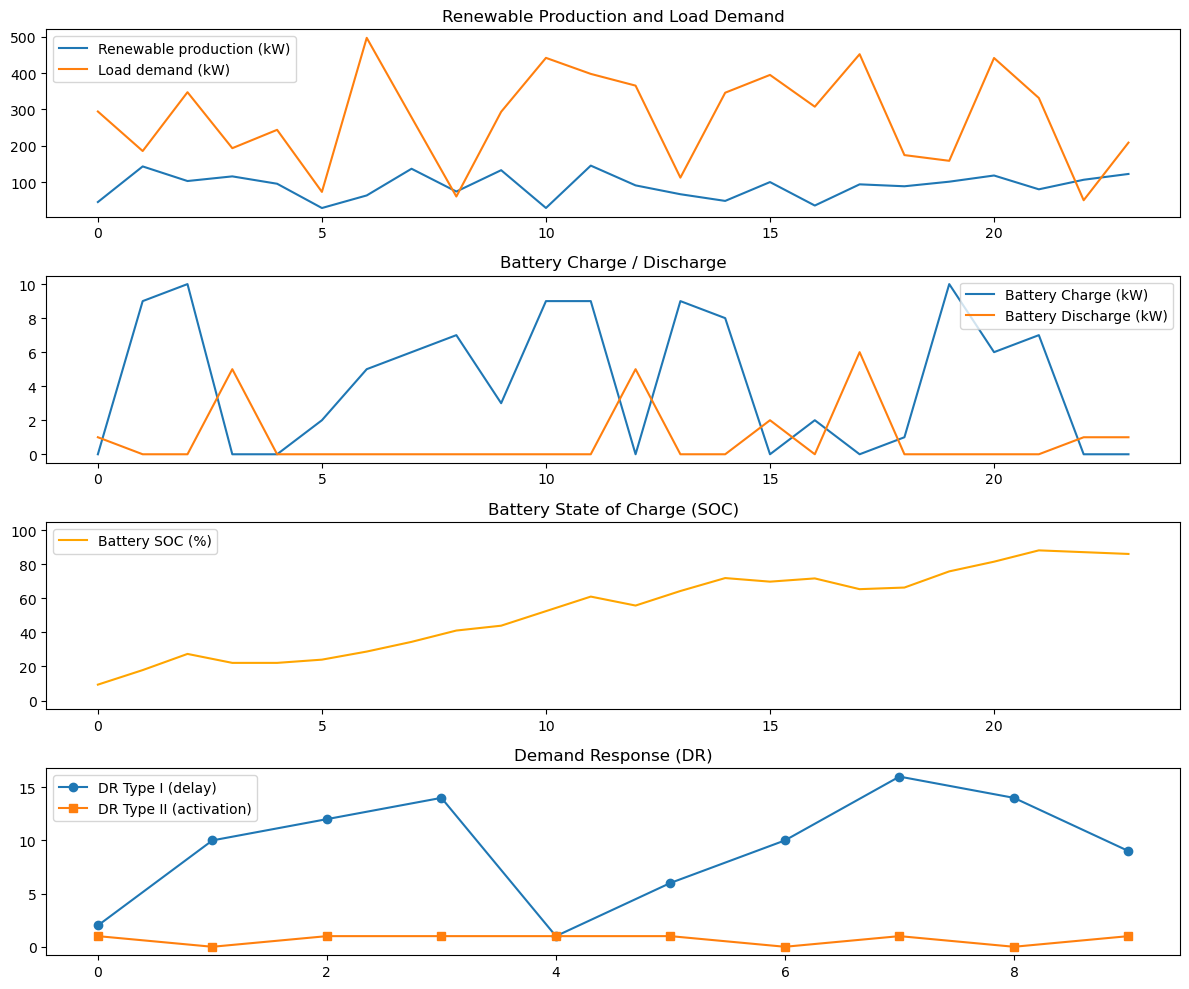

In [ ]:
# Battery & system parameters
battery_initial_cost = 10000  # units
battery_capacity = 100         # kWh
soc_min, soc_max = 0, 100      # SOC limits (%)
charge_efficiency = 0.95
discharge_efficiency = 0.95

# Assume best_solution contains dispatch, DR type I, DR type II
X1, X2, X3 = best_solution
T = len(X1)

# Initial SOC
soc_init = df.loc[df.index[0], 'battery_state_of_charge']

# Initialize SOC array
soc = np.zeros(T+1)
soc[0] = soc_init

# Define cycle life function based on Depth of Discharge (DoD) %
def N_cycle(DoD_percent):
    if DoD_percent <= 0:
        return float('inf')
    elif DoD_percent >= 100:
        return 1000  # very aggressive cycling wears battery fast
    else:
        # Linear approx between 5000 cycles at 20% DoD and 1000 at 100% DoD
        if DoD_percent < 20:
            return 5000
        return 5000 - (DoD_percent - 20) * (4000 / 80)

# Compute SOH degradation between two SOC points
def delta_SOH(Q_t0, Q_t1):
    DoD = abs(Q_t1 - Q_t0)
    if DoD == 0:
        return 0
    N = N_cycle(DoD)
    return 1 / N


renewable_power = []
grid_load = []
battery_charge = []
battery_discharge = []
soc_list = []

total_degradation_cost = 0

for t in range(T):
    ren = df.loc[df.index[t], 'solar_pv_output'] + df.loc[df.index[t], 'wind_power_output']
    load = df.loc[df.index[t], 'grid_load_demand']
    dispatch = X1[t]

    # Battery dispatch (charge positive, discharge negative)
    if dispatch >= 0:
        charge = dispatch
        discharge = 0
    else:
        charge = 0
        discharge = -dispatch

    battery_charge.append(charge)
    battery_discharge.append(discharge)

    # SOC with efficiencies
    soc[t+1] = soc[t] + charge * charge_efficiency - discharge / discharge_efficiency
    soc[t+1] = max(soc_min, min(soc_max, soc[t+1]))
    soc_list.append(soc[t+1])

    # Degradation cost
    d_soh = delta_SOH(soc[t], soc[t+1])
    cost_degradation = battery_initial_cost * d_soh
    total_degradation_cost += cost_degradation

    renewable_power.append(ren)
    grid_load.append(load)

print(f"Total battery degradation cost (SOH based): {total_degradation_cost:.2f} units")
print(f"Final SOC: {soc[-1]:.2f} %")

time = np.arange(T)

plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(time, renewable_power, label='Renewable production (kW)')
plt.plot(time, grid_load, label='Load demand (kW)')
plt.title('Renewable Production and Load Demand')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(time, battery_charge, label='Battery Charge (kW)')
plt.plot(time, battery_discharge, label='Battery Discharge (kW)')
plt.title('Battery Charge / Discharge')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(time, soc_list, label='Battery SOC (%)', color='orange')
plt.title('Battery State of Charge (SOC)')
plt.ylim(soc_min - 5, soc_max + 5)
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(np.arange(len(X2)), X2, 'o-', label='DR Type I (delay)')
plt.plot(np.arange(len(X3)), X3, 's-', label='DR Type II (activation)')
plt.title('Demand Response (DR)')
plt.legend()

plt.tight_layout()
plt.show()


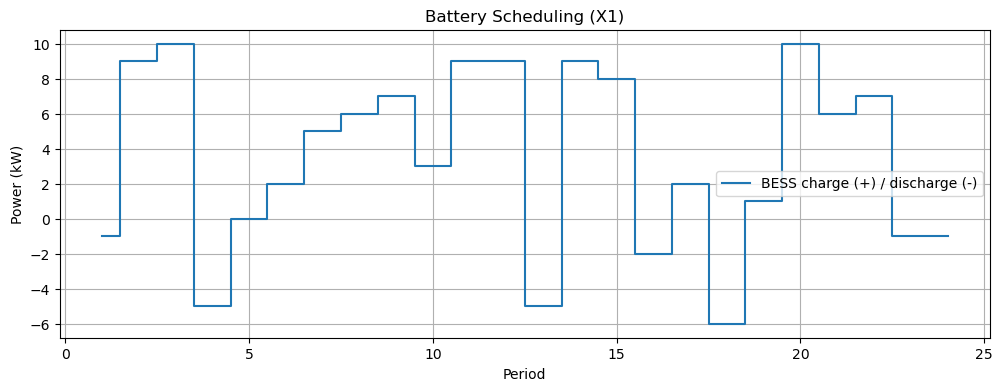

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6392\3452162364.py:19: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(1, M1 + 1), X2, use_line_collection=True, basefmt=" ", linefmt='tab:orange', markerfmt='o')


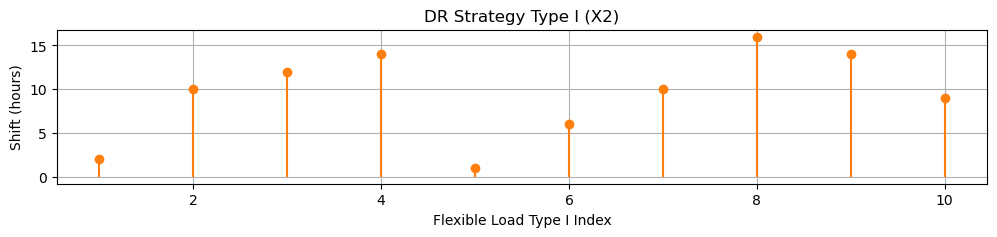

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6392\3452162364.py:28: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(1, M2 + 1), X3, use_line_collection=True, basefmt=" ", linefmt='tab:green', markerfmt='s')


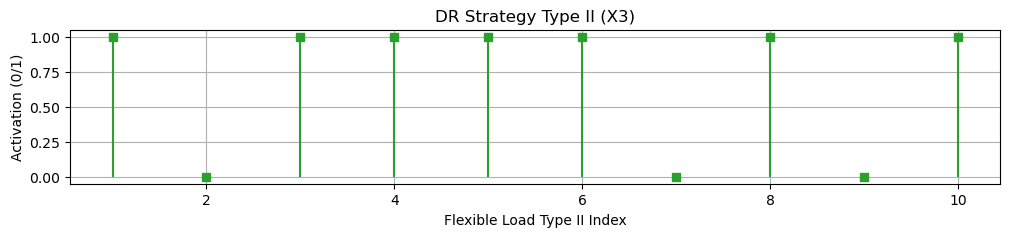

In [ ]:
X1, X2, X3 = best_solution

T = len(X1)
M1 = len(X2)
M2 = len(X3)

# Battery dispatch (X1)
plt.figure(figsize=(12, 4))
plt.step(range(1, T + 1), X1, where='mid', label='BESS charge (+) / discharge (-)', color='tab:blue')
plt.xlabel('Period')
plt.ylabel('Power (kW)')
plt.title('Battery Scheduling (X1)')
plt.grid(True)
plt.legend()
plt.show()

# DR Type I (X2)
plt.figure(figsize=(12, 2))
plt.stem(range(1, M1 + 1), X2, use_line_collection=True, basefmt=" ", linefmt='tab:orange', markerfmt='o')
plt.xlabel('Flexible Load Type I Index')
plt.ylabel('Shift (hours)')
plt.title('DR Strategy Type I (X2)')
plt.grid(True)
plt.show()

# DR Type II (X3)
plt.figure(figsize=(12, 2))
plt.stem(range(1, M2 + 1), X3, use_line_collection=True, basefmt=" ", linefmt='tab:green', markerfmt='s')
plt.xlabel('Flexible Load Type II Index')
plt.ylabel('Activation (0/1)')
plt.title('DR Strategy Type II (X3)')
plt.grid(True)
plt.show()


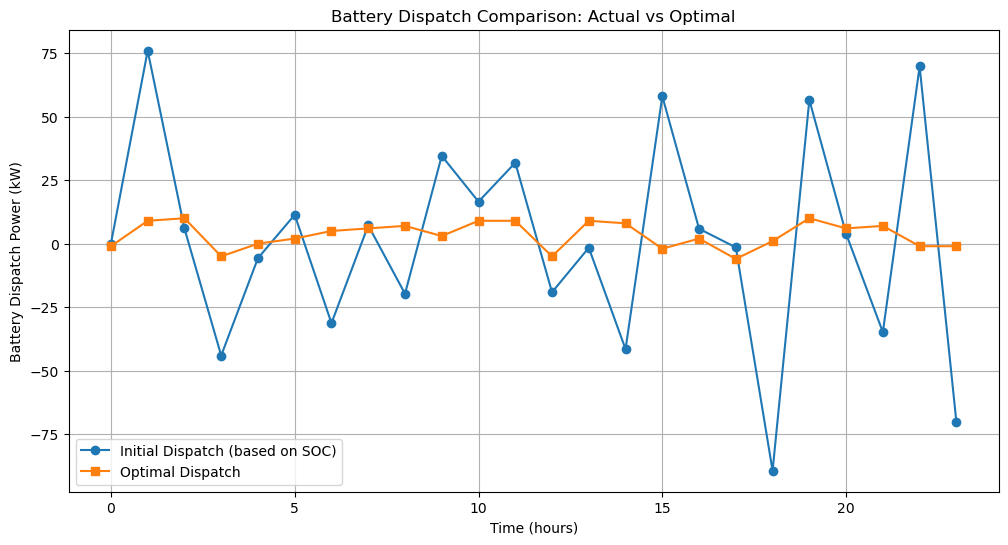

In [ ]:
battery_capacity = 100  # battery capacity in kWh
T = 24  # number of time periods (e.g., 24 hours)

soc_percent = df['battery_state_of_charge'].values
soc_percent = soc_percent[:T]
soc_kWh = soc_percent * battery_capacity / 100
dispatch_real = np.diff(soc_kWh, prepend=soc_kWh[0])

dispatch_opt = best_solution[0]

time = np.arange(T)
plt.figure(figsize=(12, 6))
plt.plot(time, dispatch_real, 'o-', label='Initial Dispatch (based on SOC)')
plt.plot(time, dispatch_opt, 's-', label='Optimal Dispatch')
plt.xlabel('Time (hours)')
plt.ylabel('Battery Dispatch Power (kW)')
plt.title('Battery Dispatch Comparison: Actual vs Optimal')
plt.legend()
plt.grid(True)
plt.show()


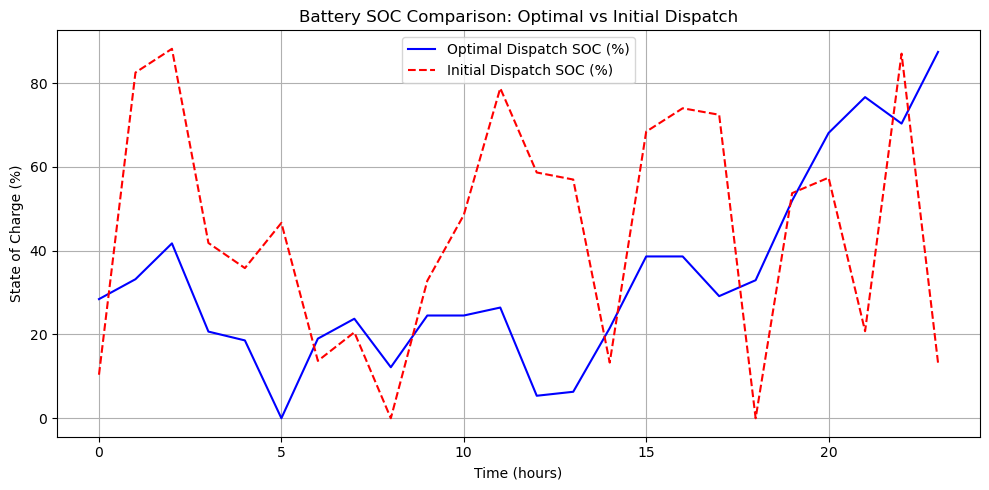

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Battery & system parameters
battery_capacity = 100           # kWh
soc_min, soc_max = 0, 100        # SOC limits (%)
charge_efficiency = 0.95
discharge_efficiency = 0.95

# Time horizon
T = len(best_solution[0])        # Assuming best_solution[0] is the dispatch plan (X1)
soc_init = df.loc[df.index[0], 'battery_state_of_charge']

# Plot SOC comparison
time = np.arange(T)
plt.figure(figsize=(10, 5))
plt.plot(time, optimal_soc, label='Optimal Dispatch SOC (%)', color='blue')
plt.plot(time, initial_soc, label='Initial Dispatch SOC (%)', color='red', linestyle='--')
plt.title('Battery SOC Comparison: Optimal vs Initial Dispatch')
plt.xlabel('Time (hours)')
plt.ylabel('State of Charge (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


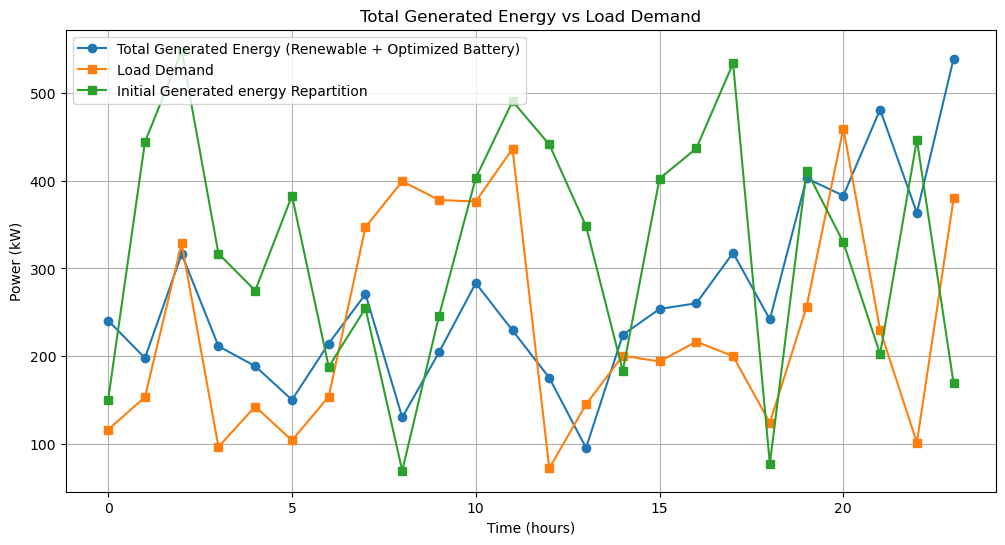

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# We consider that our BSS is set of 5 Batteries
T = len(dispatch_opt)

renewable = np.array(y_pred_renewable)[:T]
load = np.array(y_pred_load)[:T]
battery_dispatch = np.array(optimal_soc)[:T]
dispatch_init = np.array(initial_soc)[:T]
# Total generated = renewable + battery dispatch
total_generated = renewable + battery_dispatch*5
total_generated1 = renewable + dispatch_init*5
time = np.arange(T)

plt.figure(figsize=(12, 6))
plt.plot(time, total_generated, label='Total Generated Energy (Renewable + Optimized Battery)', marker='o')
plt.plot(time, load, label='Load Demand', marker='s')
plt.plot(time, total_generated1, label='Initial Generated energy Repartition', marker='s')
plt.xlabel('Time (hours)')
plt.ylabel('Power (kW)')
plt.title('Total Generated Energy vs Load Demand')
plt.legend()
plt.grid(True)
plt.show()


## Method 2: Particle Swarm Optimization (PSO) for Battery Demand Response Optimization

This method uses the PSO algorithm to optimize battery dispatch and demand response (DR) scheduling.

### Problem Context

- **Objective**: Optimize battery charging/discharging and demand response actions to minimize energy costs, reduce load deficits, and efficiently use renewable energy.
- **Decision Variables**:
  - **Battery Dispatch Steps (X1)**: Amount of battery charge/discharge at each time step.
  - **DR Timing (X2)**: Start times for demand response events.
  - **DR Binary Controls (X3)**: On/off states for demand response actions.

### PSO Algorithm Steps for Battery DR Optimization

1. **Initialization**  
   Initialize a swarm of particles where each particle encodes a candidate solution composed of:
   - Battery dispatch profile over the time horizon (e.g., 24 hours)
   - DR event start times
   - DR on/off control signals

2. **Fitness Evaluation**  
   For each particle:
   - Decode its position into discrete decision variables (X1, X2, X3).
   - Simulate battery SOC over time considering dispatch steps.
   - Calculate penalties for:
     - Battery operational constraints (SOC limits, max power).
     - Load deficits (when demand exceeds supply).
     - Energy surplus.
     - DR event costs.
   - Compute a fitness score inversely proportional to total cost and penalties.

3. **Update Personal and Global Bests**  
   - Each particle remembers its best historical solution (personal best).
   - The swarm identifies the best overall solution (global best).

4. **Velocity and Position Update**  
   - Adjust particle velocities based on:
     - Inertia (previous velocity),
     - Cognitive component (towards personal best),
     - Social component (towards global best).
   - Update particle positions accordingly, ensuring solutions remain within valid bounds.

5. **Iteration**  
   - Repeat fitness evaluation and updates for a set number of iterations or until convergence.
   - Continuously improve battery dispatch and DR scheduling plans to reduce operational costs and respect constraints.

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

class BatteryDRPSO:
    def __init__(self, df, y_pred_load, y_pred_renewable,
                 T=24, cmax=20, M1=10, M2=10, Te=24, Td=4, swarm_size=50):
        self.df = df
        self.y_pred_load = y_pred_load
        self.y_pred_renewable = y_pred_renewable

        self.T = T
        self.cmax = cmax
        self.M1 = M1
        self.M2 = M2
        self.Te = Te
        self.Td = Td

        self.swarm_size = swarm_size
        self.w = 0.7        # Inertia weight
        self.c1 = 1.5       # Cognitive coefficient
        self.c2 = 1.5       # Social coefficient

        # Problem bounds
        self.X1_bounds = (-cmax, cmax)
        self.X2_bounds = (0, Te - Td)
        self.X3_bounds = (0, 1)

        self.dim = T + M1 + M2
        self.P_batt_max = 100
        self.E_batt = 100
        self.soc_min = 0
        self.soc_max = 100

        self.global_best_position = None
        self.global_best_fitness = -np.inf

    def decode_position(self, position):
        """Convert continuous particle position to discrete chromosome (X1, X2, X3)."""
        X1 = np.round(position[:self.T]).astype(int)
        X1 = np.clip(X1, *self.X1_bounds).tolist()

        X2 = np.round(position[self.T:self.T+self.M1]).astype(int)
        X2 = np.clip(X2, *self.X2_bounds).tolist()

        X3 = np.round(position[self.T+self.M1:]).astype(int)
        X3 = np.clip(X3, *self.X3_bounds).tolist()

        return (X1, X2, X3)

    def fitness_function(self, position):
        X1, X2, X3 = self.decode_position(position)
        soc = self.df.iloc[0]['battery_state_of_charge']
        total_cost = 0.0

        for t in range(self.T):
            renewable_power = self.y_pred_renewable[t]
            load_demand = self.y_pred_load[t]
            c = X1[t]
            battery_energy = c * (self.E_batt / 100)  # kWh
            battery_power = battery_energy  # 1-hour time step

            if abs(battery_power) > self.P_batt_max:
                return 1e-8
            soc += c
            if soc < self.soc_min or soc > self.soc_max:
                return 1e-8

            net_supply = renewable_power + battery_power
            deficit = max(0, load_demand - net_supply)
            surplus = max(0, net_supply - load_demand)

            battery_usage_penalty = abs(c) * 0.05
            deficit_penalty = deficit * 1.0
            surplus_penalty = surplus * 0.1
            total_cost += battery_usage_penalty + deficit_penalty + surplus_penalty

        total_cost += sum(X2) * 0.05 + sum(X3) * 0.03
        k = 0.1
        SN = 1e-6
        return 1 / ((SN + total_cost) ** k)

    def run(self, iterations=100):
        particles = np.random.uniform(-1, 1, (self.swarm_size, self.dim))
        velocities = np.zeros_like(particles)
        personal_best = particles.copy()
        personal_best_scores = np.array([self.fitness_function(p) for p in particles])

        best_idx = np.argmax(personal_best_scores)
        self.global_best_position = personal_best[best_idx]
        self.global_best_fitness = personal_best_scores[best_idx]

        fitness_curve = []

        for it in range(iterations):
            for i in range(self.swarm_size):
                r1 = np.random.rand(self.dim)
                r2 = np.random.rand(self.dim)
                velocities[i] = (
                    self.w * velocities[i]
                    + self.c1 * r1 * (personal_best[i] - particles[i])
                    + self.c2 * r2 * (self.global_best_position - particles[i])
                )
                particles[i] += velocities[i]

                fitness = self.fitness_function(particles[i])
                if fitness > personal_best_scores[i]:
                    personal_best[i] = particles[i]
                    personal_best_scores[i] = fitness

                    if fitness > self.global_best_fitness:
                        self.global_best_position = particles[i]
                        self.global_best_fitness = fitness

            fitness_curve.append(self.global_best_fitness)
            print(f"Iteration {it+1} - Best Fitness: {self.global_best_fitness:.5f}")

        best_solution = self.decode_position(self.global_best_position)
        return best_solution, self.global_best_fitness, fitness_curve

    def plot_fitness(self, fitness_curve):
        plt.figure(figsize=(10, 5))
        plt.plot(fitness_curve, label='Best Fitness')
        plt.xlabel('Iteration')
        plt.ylabel('Fitness')
        plt.title('PSO Convergence Curve')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()
## This algorithm's objective function does not include penalty on SoH cost. However, SoH cost will be calculated separately after the optimization.

### PSO Weights and Fitness Function Rationale

- **Fitness Penalties:**
  - `deficit * 1.0`: High penalty to prioritize meeting load demand.
  - `surplus * 0.1`: Moderate penalty for wasted renewable energy.
  - `abs(c) * 0.05`: Small penalty for battery usage to reflect cycling cost.
  - `sum(X2) * 0.05`, `sum(X3) * 0.03`: Minor penalties for flexibility/control actions.

- **PSO Hyperparameters:**
  - `w = 0.7`: Inertia weight balances exploration and exploitation.
  - `c1 = 1.5`: Cognitive factor — trust in personal best.
  - `c2 = 1.5`: Social factor — trust in global best.

> SoH cost is excluded from the fitness function and evaluated separately after optimization.


Iteration 1 - Best Fitness: 0.44385
Iteration 2 - Best Fitness: 0.44440
Iteration 3 - Best Fitness: 0.44496
Iteration 4 - Best Fitness: 0.44500
Iteration 5 - Best Fitness: 0.44507
Iteration 6 - Best Fitness: 0.44518
Iteration 7 - Best Fitness: 0.44525
Iteration 8 - Best Fitness: 0.44525
Iteration 9 - Best Fitness: 0.44525
Iteration 10 - Best Fitness: 0.44525
Iteration 11 - Best Fitness: 0.44525
Iteration 12 - Best Fitness: 0.44525
Iteration 13 - Best Fitness: 0.44525
Iteration 14 - Best Fitness: 0.44526
Iteration 15 - Best Fitness: 0.44526
Iteration 16 - Best Fitness: 0.44526
Iteration 17 - Best Fitness: 0.44526
Iteration 18 - Best Fitness: 0.44530
Iteration 19 - Best Fitness: 0.44530
Iteration 20 - Best Fitness: 0.44530
Iteration 21 - Best Fitness: 0.44538
Iteration 22 - Best Fitness: 0.44538
Iteration 23 - Best Fitness: 0.44542
Iteration 24 - Best Fitness: 0.44542
Iteration 25 - Best Fitness: 0.44542
Iteration 26 - Best Fitness: 0.44542
Iteration 27 - Best Fitness: 0.44542
Iteration 

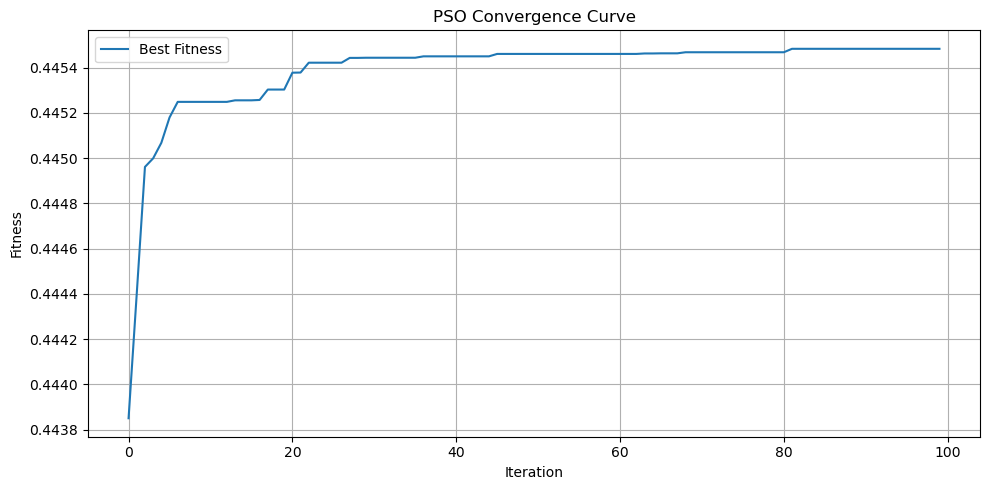

In [ ]:
pso = BatteryDRPSO(df, y_pred_load, y_pred_renewable)
best_solution, best_fitness, fitness_curve = pso.run(iterations=100)

# Fitness curve
pso.plot_fitness(fitness_curve)


✅ Optimal dispatch degradation cost: 40.41 units
❌ Initial dispatch degradation cost: 177.10 units


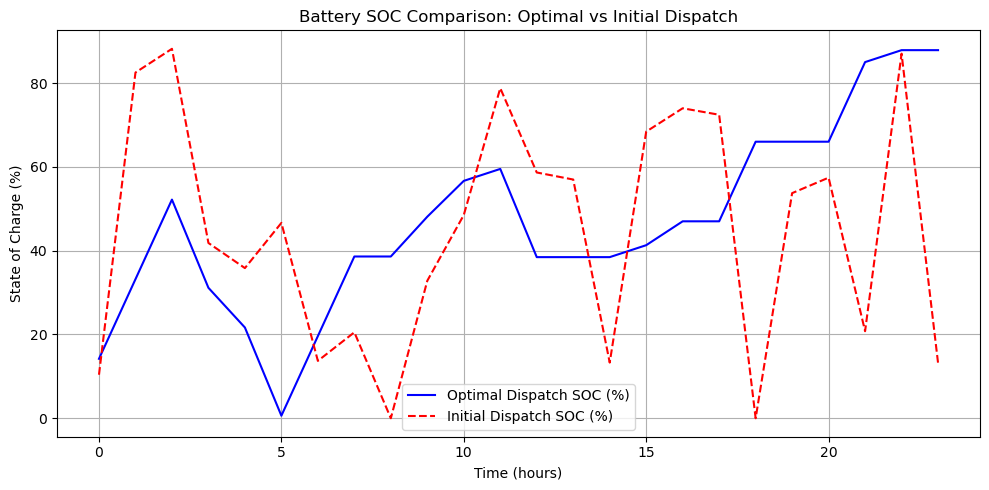

In [ ]:

# Battery & system parameters
battery_initial_cost = 10000     # Currency units, e.g., dollars
battery_capacity = 100           # kWh
soc_min, soc_max = 0, 100        # SOC limits (%)
charge_efficiency = 0.95
discharge_efficiency = 0.95

# Time horizon
T = len(best_solution[0])
soc_init = df.loc[df.index[0], 'battery_state_of_charge']

# Depth of Discharge points (%) and corresponding cycle life (NMC)
dod_points = np.array([0, 10, 20, 40, 60, 80, 100])
cycle_life_points = np.array([np.inf, 6000, 2000, 1000, 600, 400, 300])

def N_cycle(DoD_percent):
    """
    Return estimated battery cycle life for a given Depth of Discharge (DoD%) based on linear interpolation.
    DoD_percent: float or array-like
    """
    DoD_percent = np.clip(DoD_percent, 0, 100)
    if DoD_percent == 0:
        return float('inf')
    return float(np.interp(DoD_percent, dod_points, cycle_life_points))

# SOH degradation per time step
def delta_SOH(Q_t0, Q_t1):
    DoD = abs(Q_t1 - Q_t0)
    if DoD == 0:
        return 0
    N = N_cycle(DoD)
    return 1 / N

# Compute total degradation cost and SOC profile over T steps
def compute_degradation_cost(dispatch):
    soc = np.zeros(T+1)
    soc[0] = soc_init
    total_degradation_cost = 0
    soc_list = []

    for t in range(T):
        d = dispatch[t]
        if d >= 0:
            charge = d
            discharge = 0
        else:
            charge = 0
            discharge = -d

        soc[t+1] = soc[t] + charge * charge_efficiency - discharge / discharge_efficiency
        soc[t+1] = max(soc_min, min(soc_max, soc[t+1]))
        soc_list.append(soc[t+1])

        d_soh = delta_SOH(soc[t], soc[t+1])
        cost_degradation = battery_initial_cost * d_soh
        total_degradation_cost += cost_degradation

    return total_degradation_cost, soc_list


optimal_dispatch = best_solution[0]
optimal_cost, optimal_soc = compute_degradation_cost(optimal_dispatch)

initial_dispatch = dispatch_real[:T]  # Truncate to T steps if needed
initial_cost, initial_soc = compute_degradation_cost(initial_dispatch)

print(f"✅ Optimal dispatch degradation cost: {optimal_cost:.2f} units")
print(f"❌ Initial dispatch degradation cost: {initial_cost:.2f} units")


time = np.arange(T)
plt.figure(figsize=(10, 5))
plt.plot(time, optimal_soc, label='Optimal Dispatch SOC (%)', color='blue')
plt.plot(time, initial_soc, label='Initial Dispatch SOC (%)', color='red', linestyle='--')
plt.title('Battery SOC Comparison: Optimal vs Initial Dispatch')
plt.xlabel('Time (hours)')
plt.ylabel('State of Charge (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Comparaison:

## Genetic Algorithm (GA)

- **Handling Mixed Discrete Variables**  
  The battery dispatch steps (charge/discharge levels) and demand response (DR) timing and binary controls are naturally represented as discrete variables, which GA’s chromosome-based encoding handles well.

- **Maintaining Diversity for Complex Constraints**  
  Battery State of Charge (SOC) constraints and DR event constraints create a complex, nonlinear search space. GA’s crossover and mutation maintain solution diversity, helping to avoid local optima.

- **Flexibility in Solution Structure**  
  GA can effectively combine multiple decision variables (battery dispatch, DR timing, DR on/off) in a single chromosome, allowing flexible optimization of interdependent variables.

- **Good for Global Search**  
  By evolving a population of candidate solutions, GA explores multiple regions simultaneously, which is helpful given the complex interactions between battery operation and renewable generation variability.

## Particle Swarm Optimization (PSO)

- **Faster Convergence and Simplicity**  
  PSO requires fewer algorithmic parameters and typically converges faster, enabling quicker optimization cycles for battery dispatch and DR scheduling.

- **Effective Continuous-to-Discrete Decoding**  
  Although PSO operates in continuous space, it can be adapted to optimize discrete decisions through position decoding, suitable for mixed-variable problem.

- **Balancing Exploration and Exploitation in Real-Time Applications**  
  PSO’s velocity update mechanism efficiently balances global and local search, making it well suited for adapting battery dispatch in response to dynamic load and renewable forecasts.

- **Computational Efficiency**  
  PSO is more lightweight computationally, allowing easier integration in operational environments where optimization speed matters.



# VI. Conclusions:

In this project, two optimization techniques—Genetic Algorithm (GA) and Particle Swarm Optimization (PSO)—were explored for optimizing battery energy storage dispatch and demand response scheduling in a renewable energy system.

Both methods demonstrated their ability to reduce operational costs and improve energy management by coordinating battery use and flexible loads. The inclusion of battery State of Health (SOH) considerations in the cost function ensured that the optimization not only focused on immediate performance but also on preserving battery longevity.

While GA provided strong global search capabilities through evolutionary operations, PSO offered a simpler yet effective swarm-based approach for finding optimal solutions. Comparing the two algorithms highlighted trade-offs in convergence speed, solution quality, and computational complexity.

Overall, the project showcases how advanced optimization algorithms can be leveraged to balance cost, reliability, and sustainability in modern energy systems, paving the way for smarter grid management.

# Further enhancement:
Use data with more features and information on battery details and load usage with the associated system architecture.